In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import tensorflow.compat.v2 as tf


In [114]:
df=pd.read_csv('avocado.csv')

In [115]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df=df.dropna()
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [118]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [119]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [120]:
df.shape

(1517, 14)

In [121]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [122]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

Visualization

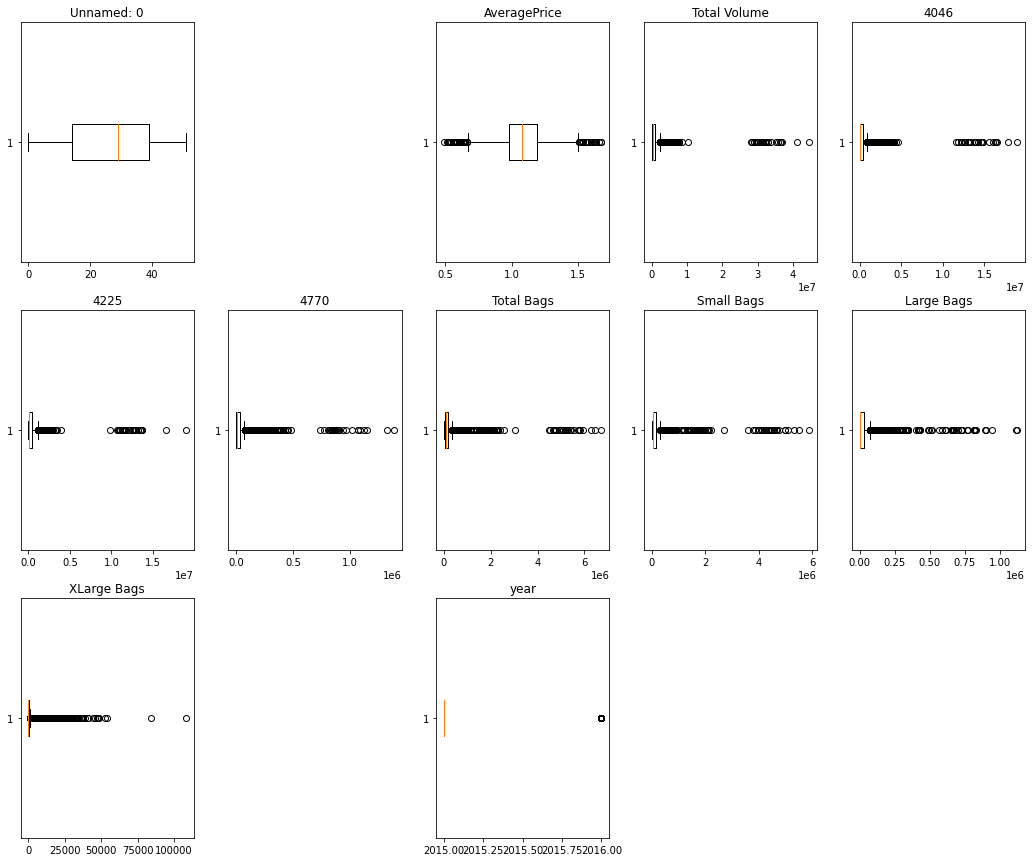

In [123]:
plt.figure(figsize=(18,15))
for i in range (len(df.columns)):
    if df.dtypes[i] !='object':
        plt.subplot(3,5,i+1)
        plt.boxplot(df[df.columns[i]],vert=False)
        plt.title(df.columns[i])
plt.show()        

As we can see from figure all the values are concertrated

<AxesSubplot:>

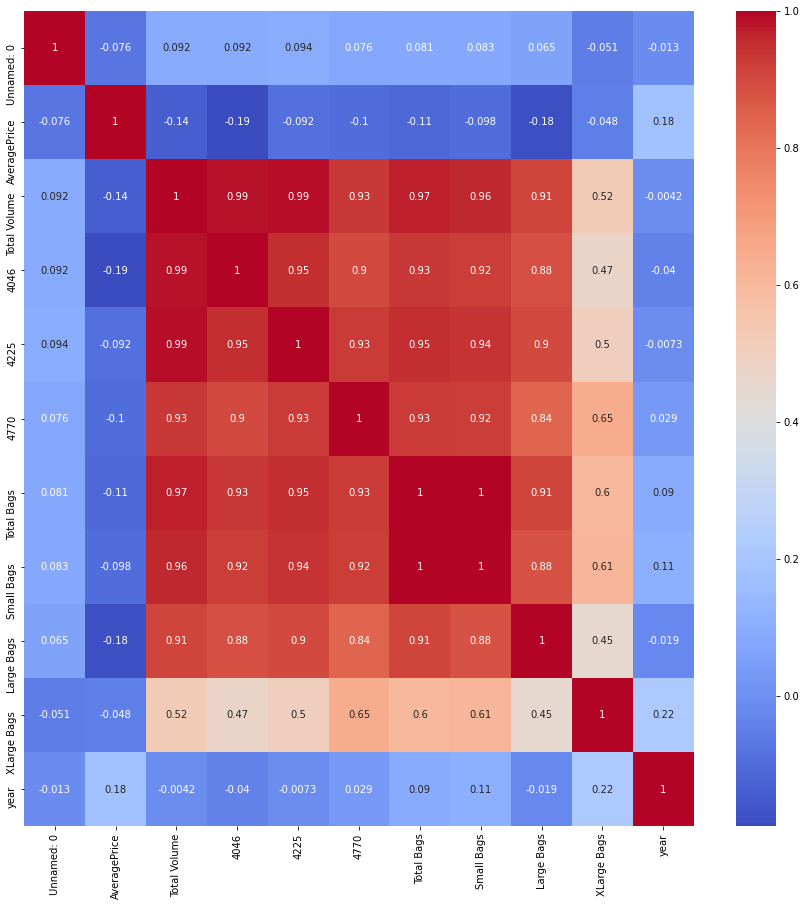

In [124]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Encoding

In [125]:
def get_unique(df,columns):
    return{column: list(df[column].unique()) for column in columns}

Now we find the categorical feature

In [126]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Date', 'type', 'region']

In [127]:
cat_col=['region','Date','type']
get_unique(df,cat_col)

{'region': ['Albany',
  'Atlanta',
  'BaltimoreWashington',
  'Boise',
  'Boston',
  'BuffaloRochester',
  'California',
  'Charlotte',
  'Chicago',
  'Columbus',
  'DallasFtWorth',
  'Denver',
  'Detroit',
  'GrandRapids',
  'GreatLakes',
  'HarrisburgScranton',
  'HartfordSpringfield',
  'Houston',
  'Indianapolis',
  'Jacksonville',
  'LasVegas',
  'LosAngeles',
  'Louisville',
  'MiamiFtLauderdale',
  'Midsouth',
  'Nashville',
  'NewYork',
  'Northeast',
  'NorthernNewEngland',
  'Orlando',
  'Philadelphia',
  'PhoenixTucson',
  'Pittsburgh',
  'Plains',
  'Portland',
  'RaleighGreensboro',
  'RichmondNorfolk',
  'Roanoke',
  'SanDiego',
  'SanFrancisco',
  'Seattle',
  'SouthCarolina',
  'SouthCentral',
  'Southeast',
  'Spokane',
  'StLouis',
  'Syracuse',
  'Tampa',
  'TotalUS',
  'West',
  'WestTexNewMexico'],
 'Date': ['27-12-2015',
  '20-12-2015',
  '13-12-2015',
  '06-12-2015',
  '29-11-2015',
  '22-11-2015',
  '15-11-2015',
  '08-11-2015',
  '01-11-2015',
  '25-10-2015',
 

In [128]:
ordinal_Feature=['Date']
nominal_Feature=['region']
target_column='type'

In [129]:
pd.get_dummies(df['region'])

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,Columbus,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
date_ordering=sorted(df['Date'].unique())

So this data shows every unique value in region will give us matrix of 1 and 0.

In [131]:
def ordinal_encode(df,column,ordering):
    df=df.copy()
    df[column]=df[column].apply(lambda x:ordering.index(x))
    return df

def onehot_encode(df, column):
    df=df.copy()
    dummies=pd.get_dummies(df[column])
    df=pd.concat([df,dummies],axis=1)
    df.drop(column,axis=1, inplace=True)
    return df

In [132]:
ordinal_encode(df,'Date',date_ordering)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [133]:
onehot_encode(df,'region')


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,0,0,0,0,0,0,0,0,0,0
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,0,0,0,0,0,0,0,0,0,0
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,0,0,0,0,0,0,0,0,0,0
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,0,0,0,0,0,0,0,0,0,0
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,...,0,0,0,0,0,0,0,0,0,0
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,...,0,0,0,0,0,0,0,0,0,0
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,...,0,0,0,0,0,0,0,0,0,0
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,...,0,0,0,0,0,0,0,0,0,0


In [134]:
le=LabelEncoder()

df[target_column]=le.fit_transform(df[target_column])

<ipython-input-134-a08f149f562b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_column]=le.fit_transform(df[target_column])


Splitting and Scalling

In [135]:
Y=df[target_column]
X=df.drop(target_column,axis=1)

In [136]:
X.shape

(1517, 13)

In [137]:
Y.shape


(1517,)

In [138]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [139]:
Y=df[target_column]
X=df.drop(target_column,axis=1)

Train_test_split

In [140]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7)

In [141]:
X_train.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
1388,32.0,15-05-2016,1.06,709563.16,5790.13,517840.35,63055.48,122877.20,122533.87,198.89,144.44,2016.0,Boston
349,14.0,20-09-2015,1.00,373545.23,129945.11,71335.62,111298.27,60966.23,38180.88,839.26,21946.09,2015.0,Detroit
1324,0.0,25-12-2016,1.03,71168.92,27464.22,2892.64,6681.19,34130.87,33449.40,662.22,19.25,2016.0,Boise
658,17.0,30-08-2015,1.22,1251081.11,18628.20,982355.97,1530.58,248566.36,208604.73,39872.77,88.86,2015.0,NewYork
565,18.0,23-08-2015,1.15,65333.20,2607.26,39932.88,1974.24,20818.82,10968.34,9442.40,408.08,2015.0,Louisville


Training

In [142]:
inputs=tf.keras.Input(65,)
X=tf.keras.layers.Dense(64,activation='relu')(inputs)
X=tf.Keras.layers.Dense(64,activation='relu')(X)
output=tf.Keras.layers.Dense(1, activation='sigmoid')(X)

model=tf.Keras.Model(inputs=inputs,output=outputs)

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['accuracy']
)

batch_size=64,
epochs=100,

history=model.fit(
   X=train,
   Y=train,
   validation_spli=0.2,
   batch_size=batch_size,
   epochs=epochs,
   callbacks=[tf.keras.callback.ReduceLroPlatteau()],
   Verbose=2
)



AttributeError: module 'tensorflow.compat.v2' has no attribute 'Keras'

In [143]:
batch_size=64,
epochs=100,

In [144]:
plt.figure(figsize=(14,10))

epochs_range=range(1, epochs + 1)
train_loss=history.history['loss']
val_boss=history.history['val_loss']

plt.plot(epoch_range,train_loss, labels='Training Loss')
plt.plot(epoch_range,val_loss, labels='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

TypeError: can only concatenate tuple (not "int") to tuple

<Figure size 1008x720 with 0 Axes>